<a href="https://colab.research.google.com/github/AeroPace/ME-592/blob/main/FinalProject_Autoenconder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topology Optimization Google Colab

https://github.com/ISosnovik/top

https://github.com/ISosnovik/nn4topopt

##Google Colab Session Setup

Check whether there are pre-existing processes running on the GPU

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed May 11 15:33:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#@AUTHOR: DANIEL PACE
#@DATE: 3/8/2022
#@PURPOSE: This block will mount your google colab drive. Successful execution
#         of the remainder of this code depends on a file structure of...
#         /MyDrive/Colab Notebooks/ME 592/HW2/HW2.ipynb
#         /MyDrive/Colab Notebooks/ME 592/HW2/data/[input_geometry/output_geometry]


import os, sys
from google.colab import drive

# This mouunts your google drive to the current runtime
drive.mount('/content/mnt', force_remount=True)
# We define a notebook path
nb_path = '/content/notebooks'
# We create a symbolic link from our drive's default "Colab Notebooks" folder to nb_path
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
# Insert nb path
sys.path.insert(0, nb_path)

Mounted at /content/mnt


###Organizing Google Colab Session

In [4]:
# Copy over the TOP4040.zip file from Google Colab Notebooks
!cp /content/notebooks/TOP4040.zip /content/
!cp /content/notebooks/top-master.zip /content/
!cp /content/notebooks/nn4topopt-master-autoencoder.zip /content/

!unzip TOP4040.zip
!rm TOP4040.zip

# Unzip the top-master.zip file into the Google Colab Session
!unzip top-master.zip
!rm top-master.zip

# Unzip the nn4topopt-master.zip file into the Google Colab Session
!unzip nn4topopt-master-autoencoder.zip
!rm nn4topopt-master-autoencoder.zip

# Moving source files to local run-directory
!mv /content/nn4topopt-master-autoencoder/conv_model.py /content/
!mv /content/nn4topopt-master-autoencoder/data_utils.py /content/
!mv /content/nn4topopt-master-autoencoder/sampler_utils.py /content/
!mv /content/nn4topopt-master-autoencoder/experiments.sh /content/
!mv /content/nn4topopt-master-autoencoder/prepare_data.py /content/
!mv /content/nn4topopt-master-autoencoder/training.py /content/

Streaming output truncated to the last 5000 lines.
  inflating: TOP4040/8442.npz        
  inflating: TOP4040/6295.npz        
  inflating: TOP4040/5202.npz        
  inflating: TOP4040/9741.npz        
  inflating: TOP4040/803.npz         
  inflating: TOP4040/2158.npz        
  inflating: TOP4040/1223.npz        
  inflating: TOP4040/2639.npz        
  inflating: TOP4040/4779.npz        
  inflating: TOP4040/3923.npz        
  inflating: TOP4040/9965.npz        
  inflating: TOP4040/6260.npz        
  inflating: TOP4040/4222.npz        
  inflating: TOP4040/4728.npz        
  inflating: TOP4040/1959.npz        
  inflating: TOP4040/7085.npz        
  inflating: TOP4040/6340.npz        
  inflating: TOP4040/8040.npz        
  inflating: TOP4040/5171.npz        
  inflating: TOP4040/9314.npz        
  inflating: TOP4040/2506.npz        
  inflating: TOP4040/210.npz         
  inflating: TOP4040/2717.npz        
  inflating: TOP4040/5732.npz        
  inflating: TOP4040/8021.npz        

###Import Python Libraries

In [ ]:
# Import libraries
!python2.7 -m pip install h5py
!python2.7 -m pip install tensorflow==1.4.1
!python2.7 -m pip install keras==2.1.2

###Prepare TOP4040 Dataset

In [6]:
# Prepare the Dataset
!python2.7 /content/prepare_data.py --source TOP4040/ --dataset-path /content/top_dataset.h5

Preparing dataset
TOP4040//* --> /content/top_dataset.h5


##Running TOP on the TOP4040 dataset

In [ ]:
!bash experiments.sh

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5

###Uniform Runs

In [7]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=1 \
                       --batch-size=64 \
                       --vol-coef=1 \
                       --iter-sampler="uniform" \
                       --save-prefix="/content/notebooks/autoencoder/"

Using TensorFlow backend.
2022-05-11 15:41:13.444094: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
Training...
Training is finished
Graph is saved: /content/notebooks/autoencoder/uniform/VOL_COEFF=1.0


In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=10 \
                       --iter-sampler="uniform" \
                       --save-prefix="/content/notebooks/"

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=50 \
                       --iter-sampler="uniform" \
                       --save-prefix="/content/notebooks/"

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=100 \
                       --iter-sampler="uniform" \
                       --save-prefix="/content/notebooks/"

###poisson_5 Runs

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=1 \
                       --iter-sampler="poisson_5" \
                       --save-prefix="/content/notebooks/"

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=10 \
                       --iter-sampler="poisson_5" \
                       --save-prefix="/content/notebooks/"

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=50 \
                       --iter-sampler="poisson_5" \
                       --save-prefix="/content/notebooks/"

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=100 \
                       --iter-sampler="poisson_5" \
                       --save-prefix="/content/notebooks/"

###poisson_10 Runs

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=1 \
                       --iter-sampler="poisson_10" \
                       --save-prefix="/content/notebooks/"

Using TensorFlow backend.
2022-05-09 11:43:09.415876: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
Training...
Training is finished
Graph is saved: /content/notebooks/poisson_10/VOL_COEFF=1.0


In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=10 \
                       --iter-sampler="poisson_10" \
                       --save-prefix="/content/notebooks/"

Using TensorFlow backend.
2022-05-09 14:05:54.408483: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
Training...
Training is finished
Graph is saved: /content/notebooks/poisson_10/VOL_COEFF=10.0


In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=50 \
                       --iter-sampler="poisson_10" \
                       --save-prefix="/content/notebooks/"

Using TensorFlow backend.
2022-05-09 16:23:47.499998: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
Training...
Training is finished
Graph is saved: /content/notebooks/poisson_10/VOL_COEFF=50.0


In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=100 \
                       --iter-sampler="poisson_10" \
                       --save-prefix="/content/notebooks/"

Using TensorFlow backend.
2022-05-09 18:43:55.951452: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
Training...
Training is finished
Graph is saved: /content/notebooks/poisson_10/VOL_COEFF=100.0


###poisson_30 Runs

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=1 \
                       --iter-sampler="poisson_30" \
                       --save-prefix="/content/notebooks/"

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=10 \
                       --iter-sampler="poisson_30" \
                       --save-prefix="/content/notebooks/"

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=50 \
                       --iter-sampler="poisson_30" \
                       --save-prefix="/content/notebooks/"

In [ ]:
!python2.7 training.py --dataset-path /content/top_dataset.h5 \
                       --epochs=30 \
                       --batch-size=64 \
                       --vol-coef=100 \
                       --iter-sampler="poisson_30" \
                       --save-prefix="/content/notebooks/"

###Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.backend import learning_phase
from keras.utils.generic_utils import Progbar

###Config

In [ ]:
input_size = 40
dataset_path = 'top_dataset.h5'
batch_size = 64
num_val_step = 10

In [8]:
!python2.7 results.py

Using TensorFlow backend.
2022-05-11 15:54:25.853337: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
80/80 [==============================] - 35s 443ms/step
DONE
^C


###Results

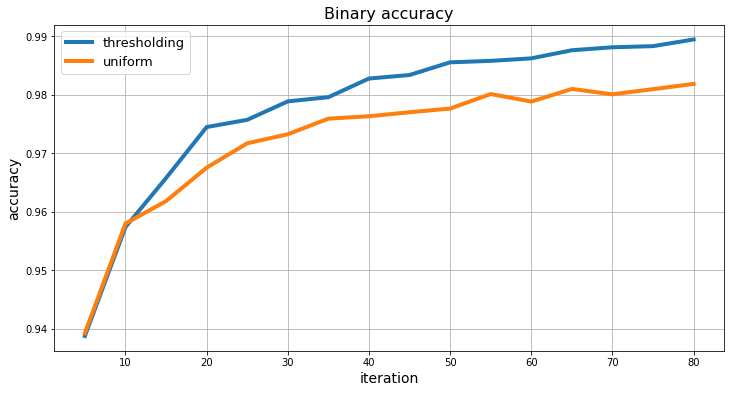

In [10]:
import matplotlib.pyplot as plt
import pickle
with open('saved_dictionary.pkl', 'rb') as f:
  experiments = pickle.load(f, encoding='latin1')

iterations = range(5, 85, 5)

plt.figure(figsize=(12, 6))

for k, v in experiments.items():
    plt.plot(iterations, v['results'], label=k, lw=4)
    
plt.title('Binary accuracy', fontsize=16)
plt.xlabel('iteration', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend(loc='best', fontsize=13)
plt.grid()
plt.show()